# Purpose:

The idea of this notebook is to prepare the data by imputing, scalating and transforming so it can be used in the following notebooks.
In this notebook you will find the process of data cleanning, feature engineering, polynomical transformations and much more.


In [25]:
import pandas as pd
import numpy as np
from scipy import stats
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
from typing import List, Dict

#Librerias de Visualización
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.table import Table

from scipy.stats import skew, norm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

from sklearn.model_selection import KFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder, \
                                  FunctionTransformer, PowerTransformer, RobustScaler, MaxAbsScaler,  KBinsDiscretizer
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif, SelectKBest, f_regression, chi2
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from patsy import dmatrix
from category_encoders import LeaveOneOutEncoder

#Reusable packages
import sys
import os
sys.path.append(os.path.abspath('../Scripts'))
from Functions.eda import *



# Removing Outliers previously discussed

In [26]:
df = pd.read_csv('..//data//raw_data//train.csv')
df = df.drop(df[(df['GrLivArea'] > 4000)
                                  & (df['SalePrice'] < 200000)].index)
df = df.drop(df[(df['GarageArea'] > 1200)
                                  & (df['SalePrice'] < 300000)].index)
df = df.drop(df[(df['TotalBsmtSF'] > 4000)
                                  & (df['SalePrice'] < 200000)].index)
df = df.drop(df[(df['1stFlrSF'] > 4000)
                                  & (df['SalePrice'] < 200000)].index)
df = df.drop(df[(df['TotRmsAbvGrd'] > 12)
                                  & (df['SalePrice'] < 230000)].index)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1454 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1454 non-null   int64  
 1   MSSubClass     1454 non-null   int64  
 2   MSZoning       1454 non-null   object 
 3   LotFrontage    1196 non-null   float64
 4   LotArea        1454 non-null   int64  
 5   Street         1454 non-null   object 
 6   Alley          90 non-null     object 
 7   LotShape       1454 non-null   object 
 8   LandContour    1454 non-null   object 
 9   Utilities      1454 non-null   object 
 10  LotConfig      1454 non-null   object 
 11  LandSlope      1454 non-null   object 
 12  Neighborhood   1454 non-null   object 
 13  Condition1     1454 non-null   object 
 14  Condition2     1454 non-null   object 
 15  BldgType       1454 non-null   object 
 16  HouseStyle     1454 non-null   object 
 17  OverallQual    1454 non-null   int64  
 18  OverallCond  

# Missing Values

In [28]:
col_with_na = {}
for col in df.columns:
    nulos = df[col].isna().sum()
    if nulos > 0:
        col_with_na[col] = nulos

print(col_with_na)

{'LotFrontage': 258, 'Alley': 1364, 'MasVnrType': 870, 'MasVnrArea': 8, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinType2': 38, 'Electrical': 1, 'FireplaceQu': 688, 'GarageType': 80, 'GarageYrBlt': 80, 'GarageFinish': 80, 'GarageQual': 80, 'GarageCond': 80, 'PoolQC': 1448, 'Fence': 1173, 'MiscFeature': 1401}


# Classifying Variables

In [29]:
numerical = ['BedroomAbvGr','BsmtFullBath','BsmtHalfBath','Fireplaces','FullBath','GarageCars', 'HalfBath','KitchenAbvGr','MoSold','MSSubClass',
             'OverallCond','OverallQual','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','3SsnPorch', 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','EnclosedPorch',
             'GarageArea','GarageYrBlt','GrLivArea','LowQualFinSF', 'LotArea', 'LotFrontage', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea',
              'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'SalePrice']

categorical = ['Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd',
             'Foundation', 'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LotConfig', 'MSZoning', 'MasVnrType',
             'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'BsmtCond', 'BsmtExposure',
            'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'ExterCond', 'ExterQual', 'Fence','FireplaceQu', 'Functional',
            'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual','LandSlope', 'LotShape', 'PavedDrive',
            'PoolQC', 'Utilities']

In [30]:
discretas = ['BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath',
             'GarageCars', 'HalfBath', 'KitchenAbvGr', 'MoSold', 'MSSubClass',
             'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'YrSold']
#====================================================================================================================================
#====================================================================================================================================
continuas = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
             'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LowQualFinSF',
             'LotArea', 'LotFrontage', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea',
             'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF',]
numericas = discretas + continuas

In [31]:
nominales = ['Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd',
             'Foundation', 'Heating', 'HouseStyle', 'LandContour', 'LotConfig', 'MSZoning', 'MasVnrType',
             'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street']
#====================================================================================================================================
#====================================================================================================================================
ordinales = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'ExterCond', 'ExterQual', 'Fence',
             'FireplaceQu', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual',
             'LandSlope', 'LotShape', 'PavedDrive', 'PoolQC', 'Utilities', 'GarageType']

# Pipeline for Cleanning, Engineering new Features & Impute nulls.

First, we will create binary variables to identify which houses have a certain characteristic and correct input errors in the data. After this, we will define the order of the ordinal features based on the datasets information. Once this task is completed, we will generate new features.

Finally, we will impute the missing values in the following order:

1. Nominal & Continuous variables will be filled with 0, representing the absence of the characteristic.

2. Discrete & Ordinal variables will be filled with the mode of the distribution.

3. We are going to create a dictionary to encoder the ordinal features based on the data provided by the author of the dataset.

Before applying the newly generated features, it is essential to define which features we will create and their respective categories.

In [32]:
new_continuas_fe = [
    'Area_Qual_Cond_Indicator', 'Area_Quality_Indicator', 'Avg_Quality', 'Avg_Room_Size',
    'Bathroom_Density','Count_Attributes', 'Exterior_Score', 'facada_houses_quality', 'Frontage_Ratio',
    'Garage_Space_Per_Car', 'Insulation_Quality', 'Interior_Score',
    'Livability_Ratio', 'Living_Space_Ratio', 'Lot_occupation', 'Maintenance_Index',
    'Outside_live_area', 'Paved_Area_Ratio', 'Price_per_sqm','Quality_conditition',
    'Quality_conditition_2', 'Remodeled_Ratio',
    'TotalBath', 'Total_Close_Live_Area', 'Total_usable_area']

new_nominales_fe = [
    'Decade_Built', 'Has_Alley', 'HasBsmt',
    'Has_Pool', 'Has_garage', 'Is_Remodeled', 'MisBsm',
    'MisGarage', 'Selling_Season', 'Style_Consistency',
    'SaleType_SaleCondition', 'SaleType_Neighbord', 'SaleCondition_Neighbord']


new_discretas_fe = [
    'Age_Variation', 'House_Age', 'House_Age2', 'House_Count','Irregular_Lot_Score', 'Lack_of_feature_index',
    'Luxury_Index', 'Luxury_Index_Avg', 'MiscFeatureExtended', 'Number_of_floors',
    'Porch_Types_Count', 'Quality_vs_Neighborhood', 'Thermal_Efficiency', 'TotalBath',
    'Years_Since_Remodel'] + discretas

# Removing skewness on SalePrice

In [33]:
df['SalePrice'] = np.log1p(df['SalePrice'])
X_train = df.drop(['SalePrice'], axis = 1)
y_train = df['SalePrice']
df_test = pd.read_csv('..//data//raw_data//test.csv')

# Preprocessing Pipelines
In this cell, I defined several classes to help clean our data.

GeneralCleaner: This class allows us to create binary variables for Basement and Garage existence. It also helps fill in null values based on the variable type ('NA' for categorical variables and 0 for numerical variables).

LotFrontageImputer: This is a custom imputer for the LotFrontage variable. It imputes a value of 0 for properties located on an alley. For properties not located on an alley, it imputes the mean LotFrontage value of houses that are also not located on an alley.

MasVnrImputer: Follows the same logic as LotFrontageImputer, but applies to MasVnrType and MasVnrArea.

BaseImputer - AllCategoriesImputers: This class is crucial to our workflow. We categorize variables into four main groups: continuous, discrete, categorical, and nominal. This categorization is important because we want to avoid modifying the test set—except when making predictions with the final model—to prevent data leakage. By defining these four groups, we can apply fixed imputation techniques for null values in the test set without accessing its actual values. This separation of groups is also useful when applying scalers.

OrdenTransformCategoricasOrdinales: Converts all ordinal variables into numerical values based on the dataset's data description, while also adding a separate category for null values using the category_orders dictionary.

Most of our classes inherit from BaseEstimator and TransformerMixin in sklearn.base. The main reason for using these methods is to ensure compatibility with our defined pipelines, following the fit and transform methodology.

In [34]:
class GeneralCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
    
        columns_to_convert = [
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'PoolQC', 
            'GarageType'
        ]
        for col in columns_to_convert:
            if col in X.columns:
                X[col] = X[col].astype(object)

        
        X.loc[X['LotFrontage'].isnull(), 'LotFrontage'] = 0
        X.loc[:, 'Alley'] = X['Alley'].fillna('NA')

        # MissingBasement
        basement_fil = X[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().all(axis=1)
        basement_fil1 = X[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].notnull().any(axis=1)

        X.loc[basement_fil1, 'MisBsm'] = 0
        X.loc[basement_fil, 'MisBsm'] = 1
        X.loc[basement_fil, 'BsmtQual'] = 'NA'
        X.loc[basement_fil, 'BsmtCond'] = 'NA'
        X.loc[basement_fil, 'BsmtExposure'] = 'NA'
        X.loc[basement_fil, 'BsmtFinType1'] = 'NA'
        X.loc[basement_fil, 'BsmtFinType2'] = 'NA'
        X.loc[basement_fil, 'BsmtFinSF1'] = 0
        X.loc[basement_fil, 'BsmtFinSF2'] = 0
        X.loc[basement_fil, 'BsmtUnfSF'] = 0
        X.loc[basement_fil, 'TotalBsmtSF'] = 0
        X.loc[basement_fil, 'BsmtFullBath'] = 0
        X.loc[basement_fil, 'BsmtHalfBath'] = 0

        X.loc[X.BsmtExposure.isnull(), 'BsmtExposure'] = 'NA'
        X.loc[X.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NA'

        # FireplaceQu
        X.loc[(X.Fireplaces == 0) & (X.FireplaceQu.isnull()), 'FireplaceQu'] = 'NA'

        # Garage
        garage_fil = ((X.GarageYrBlt.isnull()) & (X.GarageType.isnull()) & (X.GarageFinish.isnull()) &
                      (X.GarageQual.isnull()) & (X.GarageCond.isnull()))
        garage_fil1 = ((X.GarageYrBlt.notnull()) | (X.GarageType.notnull()) | (X.GarageFinish.notnull()) |
                       (X.GarageQual.notnull()) | (X.GarageCond.notnull()))

        X.loc[garage_fil1, 'MisGarage'] = 0
        X.loc[garage_fil, 'MisGarage'] = 1
        X.loc[garage_fil, 'GarageYrBlt'] = 0
        X.loc[garage_fil, 'GarageType'] = 'NA'
        X.loc[garage_fil, 'GarageFinish'] = 'NA'
        X.loc[garage_fil, 'GarageQual'] = 'NA'
        X.loc[garage_fil, 'GarageCond'] = 'NA'
        X.loc[X.GarageYrBlt.isnull(), 'GarageYrBlt'] = 0

        # Fence
        X.loc[X.Fence.isnull(), 'Fence'] = 'NA'

        # PoolQC
        pool_fil = ((X.PoolArea == 0) & (X.PoolQC.isnull()))
        X.loc[pool_fil, 'PoolQC'] = 'NA'

        #Electrical
        electrical_fil = (X.Electrical.isnull())
        X.loc[electrical_fil, 'Electrical'] = 'NA'

        #LotFrontage
        lot_frontage_fil = (X.LotFrontage.isnull())
        X.loc[lot_frontage_fil, 'LotFrontage'] = 0

        #Vnr
        vnr_area_fil = (X['MasVnrArea'].isnull())
        X.loc[vnr_area_fil, 'MasVnrArea'] = 0
        vnr_type_fil = (X['MasVnrType'].isnull())
        X.loc[vnr_type_fil, 'MasVnrType'] = 'NA'

        #Misc
        X.loc[X.MiscFeature.isnull(), 'MiscFeature'] = 0
        return X
    
class BaseImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columnas, strategy, fill_value=None):
        self.columnas = columnas
        self.strategy = strategy
        self.fill_value = fill_value
        self.imputer = SimpleImputer(strategy=self.strategy, fill_value=self.fill_value)
        self.statistics_ = None

    def fit(self, X, y=None):
        if not all(col in X.columns for col in self.columnas):
            raise ValueError(f'Some columns are not present on the dataset {set(self.columnas) - set(X.columns)}')
        X_subset = X[self.columnas]

        self.imputer = SimpleImputer(
            strategy=self.strategy,
            fill_value=self.fill_value
        )
        self.imputer.fit(X_subset)

        self.statistics_ = pd.Series(
            self.imputer.statistics_,
            index=self.columnas
        )
        return self

    def transform(self, X):
        if not all(col in X.columns for col in self.columnas):
            raise ValueError(f'Some columns are not present on the dataset {set(self.columnas) - set(X.columns)}')
        X_transformed = X.copy()
        X_subset = X[self.columnas]
        X_imputed = self.imputer.transform(X_subset)
        X_transformed[self.columnas] = X_imputed
        return X_transformed

#CustomImputers
class ImputerNumericasDiscretas(BaseImputer):
    def __init__(self, discretas, fill_value = 0):
        super().__init__(
            columnas=discretas,
            strategy='constant'
        )

class ImputerNumericasContinuas(BaseImputer):
    def __init__(self, continuas, fill_value=0):
        super().__init__(
            columnas=continuas,
            strategy='constant',
        )

class ImputerCategoricasNominales(BaseImputer):
    def __init__(self, nominales, fill_value=0):
        super().__init__(
            columnas=nominales,
            strategy='constant'
        )

class ImputerCategoricasOrdinales(BaseImputer):
    def __init__(self, ordinales, fill_value='NA'):
        super().__init__(
            columnas=ordinales,
            strategy='constant'
        )

    
class OrdenTransformCategoricasOrdinales(BaseEstimator, TransformerMixin):
    def __init__(self, category_orders):
        self.category_orders = category_orders

    def fit(self, X, y=None):
        return self


    def transform(self, X):
        X_transformed = X.copy()
        for col, mapping in self.category_orders.items():
            if col in X_transformed.columns:
                X_transformed[col] = X_transformed[col].map(mapping)
        return X_transformed

class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.new_continuas = new_continuas_fe
        self.new_discretas = new_discretas_fe
        self.new_nominales = new_nominales_fe
        self.neighborhood_stats = None
        self.global_avg_price_sqm = None
        self.global_avg_quality = None

    def fit(self, X, y=None):
        df = X.copy()
        if y is not None:
            df['Is_Remodeled'] = (df['YearBuilt'] != df['YearRemodAdd']).astype('int64')
            df['House_Age'] = df['YrSold'] - df['YearBuilt']
            df['Luxury_Index'] = 0
            df['Luxury_Index'] += (
                                    (df['PoolQC'].notnull() & df['PoolQC'] > 0).astype(int) +
                                    (df['FireplaceQu'].notnull() & df['FireplaceQu'] > 0).astype(int) +
                                    df['KitchenQual'].isin([4, 5]).astype(int))
            df['SalePrice'] = y
            self.global_avg_price_sqm = (df['SalePrice'] / df['GrLivArea']).mean()
            alpha = 5
            neighborhood_group = df.groupby('Neighborhood')
            self.neighborhood_stats = pd.DataFrame({
                'House_Count': neighborhood_group.size(),
                'Avg_Quality': neighborhood_group['OverallQual'].mean(),
                'Price_per_sqm': (neighborhood_group['SalePrice'].sum() + alpha * self.global_avg_price_sqm)
                               / (neighborhood_group['GrLivArea'].sum() + alpha),
                'Remodeled_Ratio': neighborhood_group['Is_Remodeled'].mean(),
                'Luxury_Index_Avg': neighborhood_group['Luxury_Index'].mean(),
                'Age_Variation': neighborhood_group['House_Age'].std()
            }).fillna(0)
            self.global_avg_quality = df['OverallQual'].mean()
            df = df.drop(columns=['SalePrice'])
        return self



    def transform(self, X):
        df = X.copy()
        df['Lack_of_feature_index'] = df[['Street', 'Alley', 'MasVnrType', 'GarageType', 'MiscFeature',
                                        'BsmtQual', 'FireplaceQu','PoolQC','Fence']].isnull().sum(axis=1) + \
                                        (df['MasVnrType'] == 'None') + (df['CentralAir'] == 'No')
        df['MiscFeatureExtended'] = (df['PoolQC'].notnull()*1 + df['MiscFeature'].notnull()*1 +
                                df['Fence'].notnull()*1).astype(int)
        df['Has_Alley'] = df['Alley'].notnull().astype('int64')
        df['Lot_occupation'] = df['GrLivArea'] / df['LotArea']
        df['Number_of_floors'] = 1  
        df['Number_of_floors'] += (df['2ndFlrSF'] != 0)
        df['Number_of_floors'] += (df['TotalBsmtSF'] != 0)
        df['Total_Close_Live_Area'] = df['GrLivArea'] + df['TotalBsmtSF']
        df['Outside_live_area'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + \
                                df['3SsnPorch'] + df['ScreenPorch']
        df['Total_usable_area'] = df['Total_Close_Live_Area'] + df['Outside_live_area']
        df['Area_Quality_Indicator'] = df['Total_usable_area'] * df['OverallQual']
        df['Area_Qual_Cond_Indicator'] = df['Total_usable_area'] * df['OverallQual'] * df['OverallCond']
        df['TotalBath'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                        df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
        df['Has_garage'] = df['GarageYrBlt'].notnull().astype('int64')
        df['House_Age'] = df['YrSold'] - df['YearBuilt']
        df['Is_Remodeled'] = (df['YearBuilt'] != df['YearRemodAdd']).astype('int64')
        df['HasBsmt'] = df['BsmtQual'].notnull().astype('int64')
        df['Quality_conditition'] = df['OverallQual'] * df['OverallCond']
        df['Quality_conditition_2'] = df['OverallQual'] + df['OverallCond']
        df['House_Age2'] = df['YrSold'] - df['YearRemodAdd']
        df['facada_houses_quality'] = df['ExterQual'] + df['ExterCond'] + \
                                    df['PavedDrive'] + df['Fence']
        df['Livability_Ratio'] = df['GrLivArea'] / (df['LotArea'] + 1e-6)
        df['Bathroom_Density'] = df['TotalBath'] / (df['BedroomAbvGr'] + 1e-6)
        df['Avg_Room_Size'] = df['GrLivArea'] / (df['TotRmsAbvGrd'] + 1e-6)
        df['Garage_Space_Per_Car'] = df['GarageArea'] / (df['GarageCars'] + 1e-6)
        df['Luxury_Index'] = (
                                (df['PoolQC'].notna() & (df['PoolQC'] > 0)).astype(int) +
                                (df['FireplaceQu'].notna() & (df['FireplaceQu'] > 0)).astype(int) +
                                df['KitchenQual'].isin([4, 5]).astype(int)
                             )
        df['Count_Attributes'] = df[ordinales].gt(0).sum(axis=1)
        df['Has_Pool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
        df['Porch_Types_Count'] = df[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].gt(0).sum(axis=1)
        df['Exterior_Score'] = df['ExterQual'] + df['ExterCond']
        df['Interior_Score'] = df['OverallQual'] + df['KitchenQual'] + df['FireplaceQu']
        df['Maintenance_Index'] = df['OverallCond'] * (2024 - df['YearBuilt'])
        df['Years_Since_Remodel'] = df['YrSold'] - df['YearRemodAdd']
        df['Selling_Season'] = df['MoSold'].apply(lambda x: 1 if 5 <= x <= 8 else 0)
        df['Decade_Built'] = (df['YearBuilt'] // 10) * 10
        df['Frontage_Ratio'] = df['LotFrontage'] / (df['LotArea'] + 1e-6)
        df['Irregular_Lot_Score'] = df['LotShape'] + df['LandSlope']
        df['Paved_Area_Ratio'] = (df['PavedDrive'] + df['Street'].map({'Pave': 1, 'Grvl': 0})) / 2
        df['Thermal_Efficiency'] = df['HeatingQC'] + df['CentralAir'].map({'Y': 1, 'N': 0})
        df['Insulation_Quality'] = df['OverallQual'] * (df['YearBuilt'] - 1900)
        df['Living_Space_Ratio'] = df['GrLivArea'] / (df['Total_usable_area'] + 1e-6)
        df['Style_Consistency'] = (df['Exterior1st'] == df['Exterior2nd']).astype(int)
        df['SaleType_SaleCondition'] = df['SaleType'] + '_' + df['SaleCondition']
        df['SaleType_Neighbord'] = df['SaleType'] + '_' + df['Neighborhood']
        df['SaleCondition_Neighbord'] = df['SaleCondition'] + '_' + df['Neighborhood']
        if self.neighborhood_stats is not None:
            df = df.merge(self.neighborhood_stats, how='left', left_on='Neighborhood', right_index=True)
            df['House_Count'] = df['House_Count'].fillna(0)
            df['Avg_Quality'] = df['Avg_Quality'].fillna(self.global_avg_quality)
            df['Price_per_sqm'] = df['Price_per_sqm'].fillna(self.global_avg_price_sqm)
            df['Remodeled_Ratio'] = df['Remodeled_Ratio'].fillna(0)
            df['Luxury_Index_Avg'] = df['Luxury_Index_Avg'].fillna(0)
            df['Age_Variation'] = df['Age_Variation'].fillna(0)
            df['Quality_vs_Neighborhood'] = df['OverallQual'] - df['Avg_Quality']
        df[self.new_discretas] = df[self.new_discretas].astype('float64')
        df[self.new_nominales] = df[self.new_nominales].astype('category')
        return df


category_orders = {
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'ExterCond': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'ExterQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0},
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1, 'NA': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'LandSlope': {'Gtl': 2, 'Mod': 1, 'Sev': 0},
    'LotShape': {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0},
    'PavedDrive': {'Y': 2, 'P': 1, 'N': 0},
    'PoolQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'Utilities': {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1, 'NA': 0},
    'GarageType': {'NA': 0, 'Detchd': 1, 'Attchd': 2, 'BuiltIn': 3, 'Basment': 4, 'CarPort': 5, '2Types': 6}
}


pipeline_limpieza = Pipeline(steps=[
    ('Arreglar_Inconsistencias', GeneralCleaner()),
    ('Limpiar_categoricas', OrdenTransformCategoricasOrdinales(category_orders=category_orders))
])

pipeline_feature_engineering = Pipeline(steps=[
    ('Feature_Engineering', FeatureEngineeringTransformer())
])

pipeline_imputacion = Pipeline(steps=[
        ('imputer_ordinal', ImputerCategoricasOrdinales(ordinales=ordinales.copy(), fill_value='NA')),
        ('imputer_nominal', ImputerCategoricasNominales(nominales=nominales.copy() + new_nominales_fe, fill_value=0)),
        ('imputer_continuas', ImputerNumericasContinuas(continuas=continuas.copy() + new_continuas_fe, fill_value=0)),
        ('imputar_discretas', ImputerNumericasDiscretas(discretas=discretas.copy() + new_discretas_fe, fill_value=0))
    ])


full_pipeline = Pipeline([
    ('preprocesamiento_inicial', pipeline_limpieza),
    ('feature_engineering', pipeline_feature_engineering),
    ('imputacion_final', pipeline_imputacion)
])
# =====================================================================
X_train_fe = full_pipeline.fit_transform(X_train, y_train)
X_test_fe = full_pipeline.transform(df_test)
print('Shape of  X_train_fe:', X_train_fe.shape)
print('Number of Nulls TRAIN: ', X_train_fe.isnull().sum().sum())
print('Number of Nulls TEST: ', X_test_fe.isnull().sum().sum())




Shape of  X_train_fe: (1454, 132)
Number of Nulls TRAIN:  0
Number of Nulls TEST:  0


c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [35]:
#Updating the feature list
new_continuas_fe = [
    'Area_Qual_Cond_Indicator', 'Area_Quality_Indicator', 'Avg_Quality', 'Avg_Room_Size',
    'Bathroom_Density', 'Count_Attributes', 'Exterior_Score', 'facada_houses_quality', 'Frontage_Ratio',
    'Garage_Space_Per_Car', 'Insulation_Quality', 'Interior_Score', 'Irregular_Lot_Score',
    'Livability_Ratio', 'Living_Space_Ratio', 'Lot_occupation', 'Maintenance_Index',
    'Outside_live_area', 'Paved_Area_Ratio', 'Price_per_sqm','Quality_conditition',
    'Quality_conditition_2', 'Remodeled_Ratio', 'Thermal_Efficiency',
    'TotalBath', 'Total_Close_Live_Area', 'Total_usable_area'] + continuas

new_discretas_fe = [
    'Age_Variation', 'House_Age', 'House_Age2', 'House_Count', 'Lack_of_feature_index',
    'Luxury_Index', 'Luxury_Index_Avg', 'MiscFeatureExtended', 'Number_of_floors',
    'Porch_Types_Count', 'Quality_vs_Neighborhood', 'Years_Since_Remodel'] + discretas


new_nominales_fe = [
    'Decade_Built', 'Has_Alley', 'HasBsmt',
    'Has_Pool', 'Has_garage', 'Is_Remodeled', 'MisBsm',
    'MisGarage', 'Selling_Season', 'Style_Consistency',
    'SaleType_SaleCondition', 'SaleType_Neighbord', 'SaleCondition_Neighbord'] + nominales

#Updating the lists
numericas = new_continuas_fe + new_discretas_fe
categorical = new_nominales_fe + ordinales

# Whats the relationship of the numeric variables with respect to SalePrice?

C:\Users\javie\AppData\Local\Temp\ipykernel_19296\943193965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SalePrice'] = y_train
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


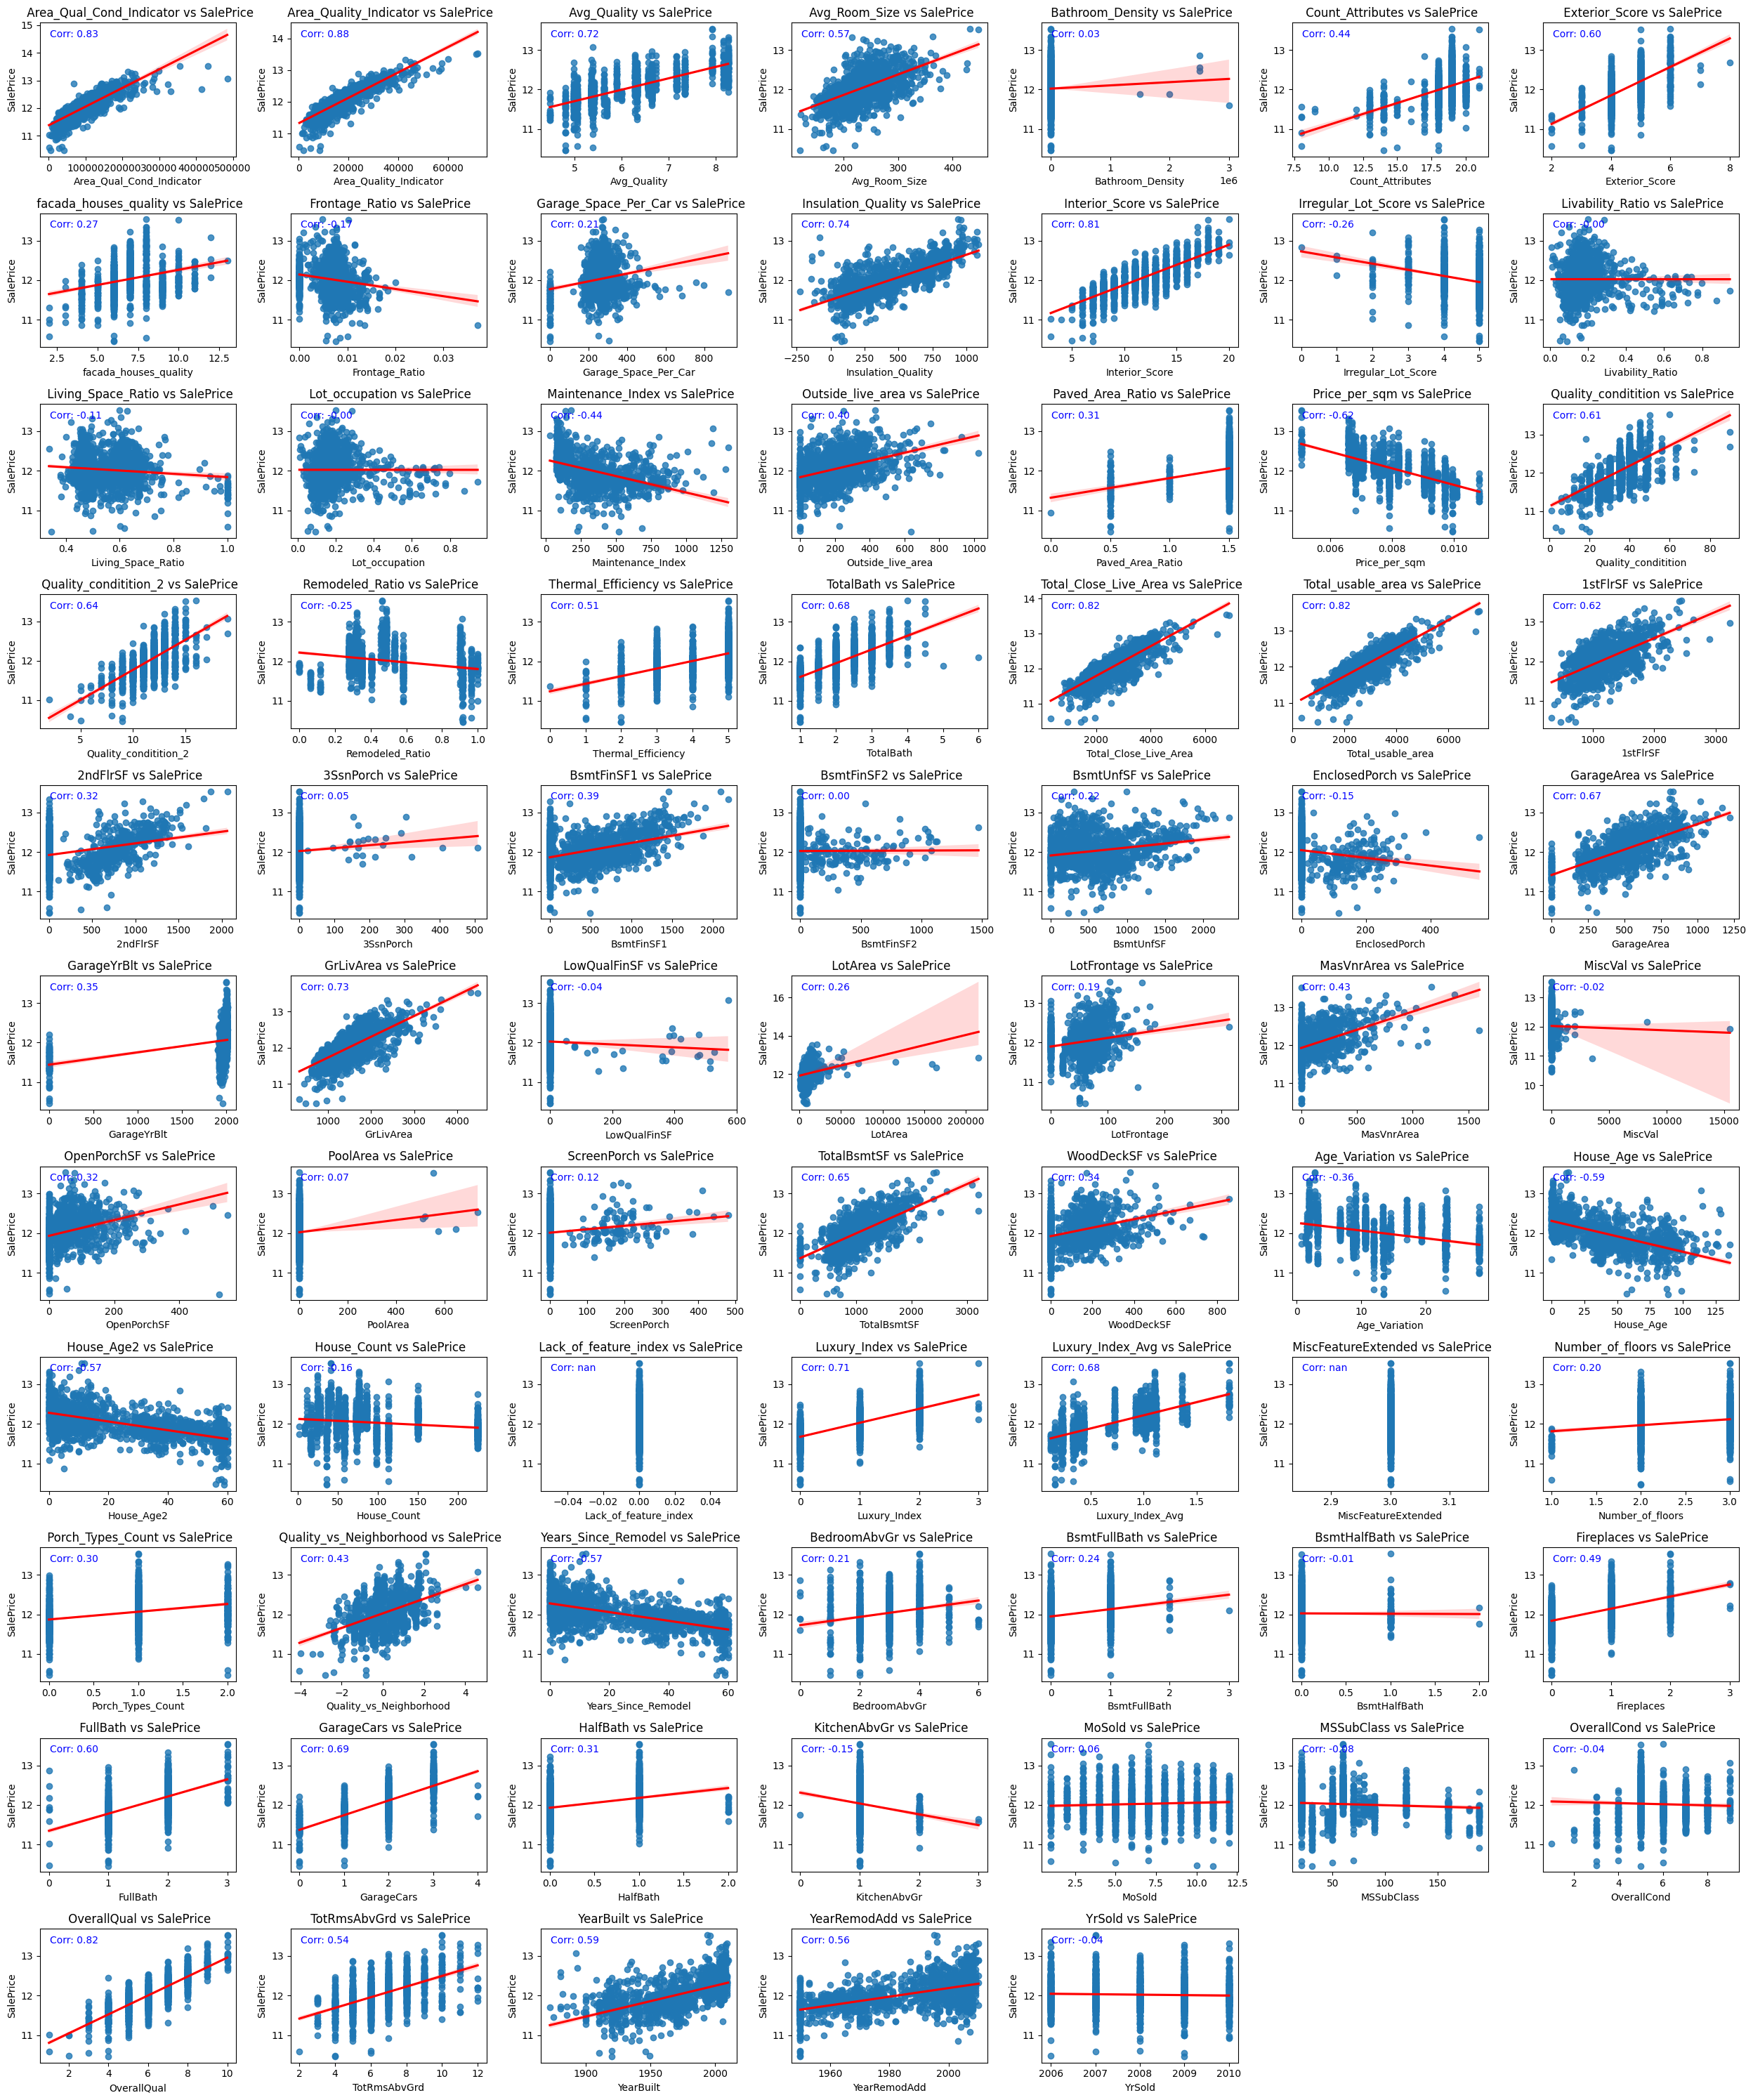

In [36]:
target = 'SalePrice'
X = X_train_fe[numericas]
X['SalePrice'] = y_train
max_sale = X['SalePrice'].max()
min_sale = X['SalePrice'].min() + 100

fig, axes = plt.subplots(11, 7, figsize=(25, 30))
axes = axes.ravel()

for i, var in enumerate(X.columns):
    sns.regplot(data=X, x=X[var], y=target, ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f' {var} vs {target}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target)
    correlation = X[var].corr(X[target])
    axes[i].annotate(f'Corr: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                    fontsize=10, color='blue', ha='left', va='top')

for j in range(len(numericas), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# High Laverage Points & non linear relationships

By examining the plots, we can see some strong predictors, which is a good sign. However, some lines deviate due to points that are far from the rest, causing the mean at those X values to be significantly higher or lower than expected.

We have identified points in our dataset that distort the true regression fit. To address this issue, we consider three possible solutions:

Winsorize class: Capping extreme values of X based on percentiles: This helps reduce the residuals of the fitted line for high-leverage points, leading to a more accurate regression fit, particularly at the tails of the distribution.

Creating stepwise variables for continuous features: This involves segmenting the variable into discrete ranges based on the training set’s distribution, with each range represented as a dummy variable. This approach helps capture non-linearity in the data.

Applying a log transformation to the dependent variable: This reduces high variance in the data. Once predictions are made, they can be transformed back using np.expm1(). We also applied a Logarithmic transformations to all independant variables which skew was higher than 1 using the LogTransformation on all continuous features. 



In [37]:
class Winsorize(BaseEstimator, TransformerMixin):
    def __init__(self, percentile_r, columns):
        self.percentile_r = percentile_r
        self.columns = columns
        self.upper_limits_ = {}

    def fit(self, X, y=None):
        X = X.copy()
        for col in self.columns:
            self.upper_limits_[col] = np.percentile(X[col], self.percentile_r)
        return self

    def transform(self, X):
        X_transf = X.copy()
        for col in self.columns:
            X_transf[col] = np.where(X_transf[col] > self.upper_limits_[col], self.upper_limits_[col], X_transf[col])

        return X_transf

pipeline_winsor = Pipeline(steps=[
    ('Winsorize', Winsorize(percentile_r=99, columns = new_continuas_fe))
])

#X_train_winsorized = pipeline_winsor.fit_transform(X_train_fe[numericas])
#X_test_winsorized = pipeline_winsor.transform(X_test_fe[numericas])

class LogTransformation(BaseEstimator, TransformerMixin):
    def __init__(self, continuous_list):
        self.continuous_list = continuous_list
        self.cols_to_transform_ = []

    def fit(self, X, y=None):
        self.cols_to_transform_ = []
        for col in self.continuous_list:
            skewness = X[col].skew()
            if skewness > 1:
                self.cols_to_transform_.append(col)
        return self

    def transform(self, X, y=None):
        X_transf = X.copy()
        cols_to_drop = []
        for col in self.cols_to_transform_:
            new_col = f'Log_{col}'
            X_transf[new_col] = np.log1p(X_transf[col]) + 1e-6
            cols_to_drop.append(col)
        X_transf = X_transf.drop(columns=cols_to_drop)
        return X_transf

remove_skew_pipeline = Pipeline(steps = [
    ('Removing Skewness', LogTransformation(continuous_list = new_continuas_fe))
])
X_train_skew = remove_skew_pipeline.fit_transform(X_train_fe[numericas])
X_test_skew = remove_skew_pipeline.transform(X_test_fe[numericas])

print(f'The number of Nulls in train is: {X_train_skew.isna().sum().sum()}')
print(f'The number of Nulls in test is: {X_test_skew.isna().sum().sum()}')

The number of Nulls in train is: 0
The number of Nulls in test is: 0


c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


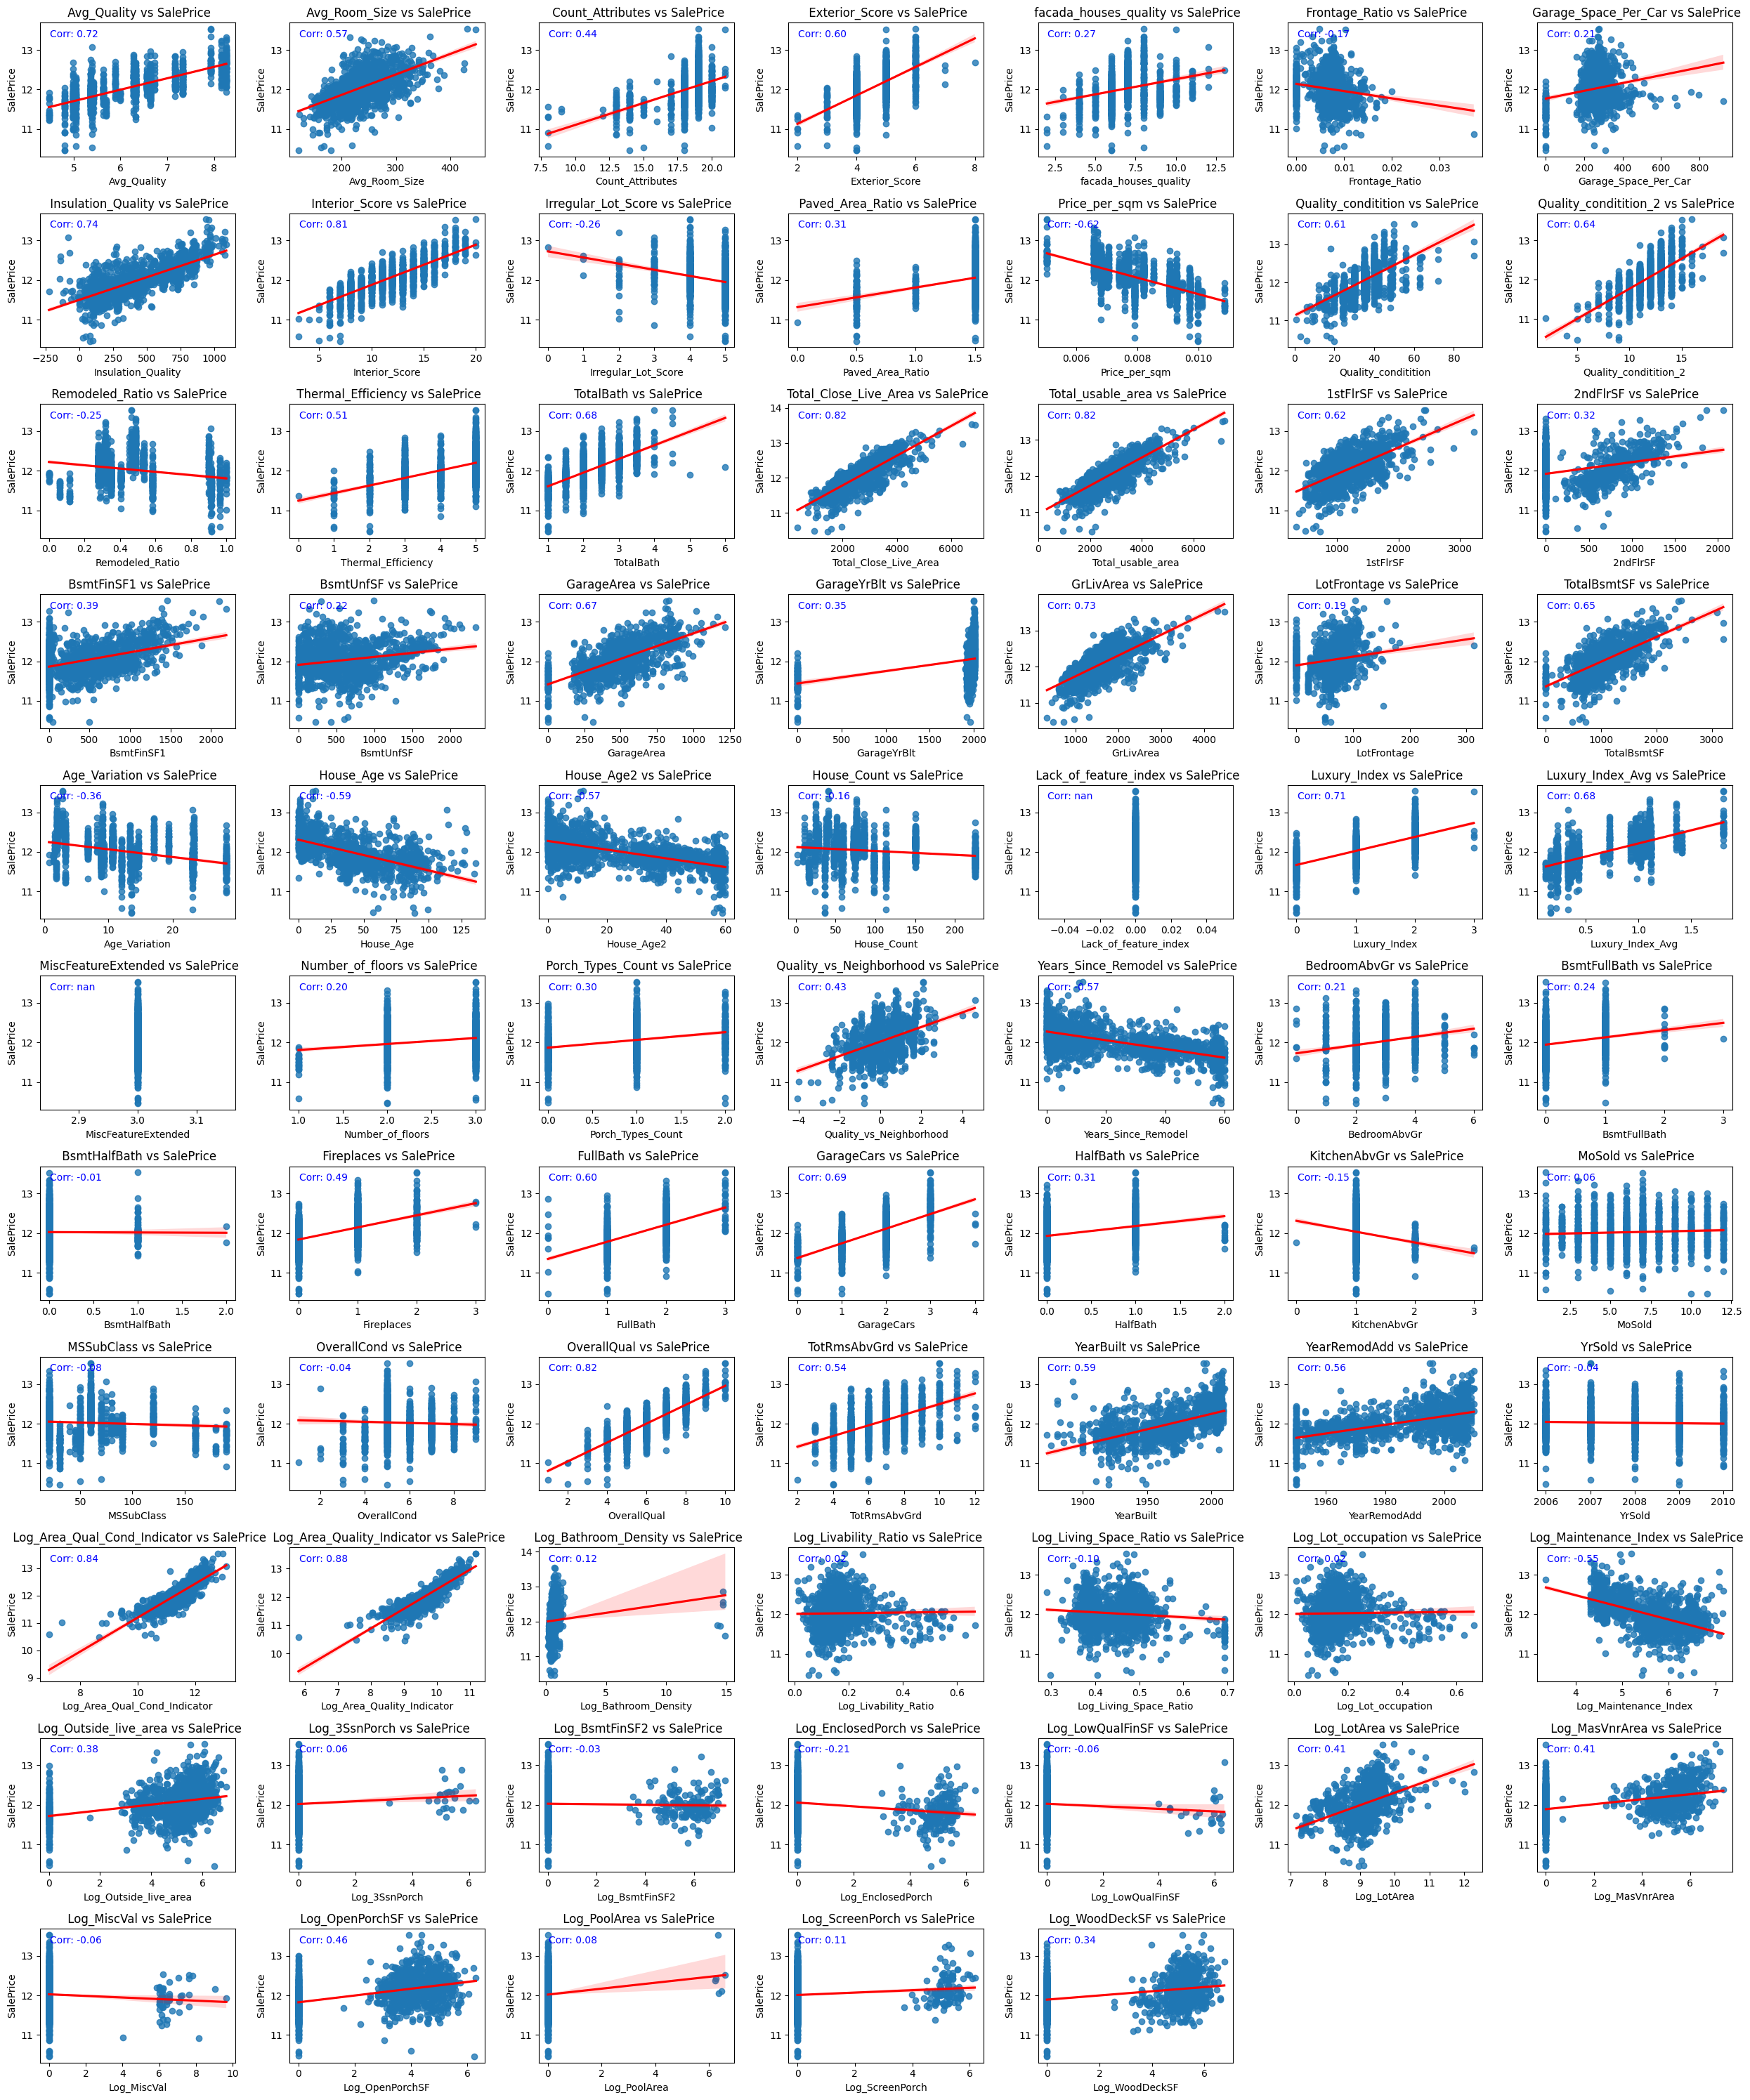

In [38]:
target = 'SalePrice'
X = X_train_skew.copy()
X['SalePrice'] = y_train


fig, axes = plt.subplots(11, 7, figsize=(25, 30))
axes = axes.ravel()

for i, var in enumerate(X.columns):
    sns.regplot(data=X, x=X[var], y=target, ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f' {var} vs {target}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target)
    correlation = X[var].corr(X[target])
    axes[i].annotate(f'Corr: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                    fontsize=10, color='blue', ha='left', va='top')

for j in range(len(numericas), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Discretizing Continuous Variables (Binning)

Here, we applied stepwise functions using cross-validation (cv = 10) to determine the optimal number of bins that minimize the MSE. We then store the best number of bins for each variable in a dictionary. This dictionary is later used by the Discretizer class to apply the optimal binning strategy. The variables to be discretized were selected by an elimination iterative process 

In [39]:
stepwise = ['Log_MasVnrArea', 'Log_LotArea', '2ndFlrSF', 'GarageYrBlt', 'LotFrontage', 'House_Count',
            'MSSubClass', 'Log_Bathroom_Density', 'Age_Variation', 'OverallCond', 'Log_Livability_Ratio']

In [40]:
var_cuts_dict = {}

for col in stepwise:
    number_cuts_bins_dict = {}
    nbins = 10

    for N in range(2, nbins + 1):
        kbins = KBinsDiscretizer(n_bins=N, encode='ordinal', strategy='quantile', subsample=None, random_state = 2025)
        X_binned = kbins.fit_transform(X_train_skew[[col]])
        model = LinearRegression().fit(X_binned, y_train)
        mse = -np.mean(cross_val_score(model, X_binned, y_train, scoring='neg_mean_squared_error', cv=10))
        number_cuts_bins_dict[N] = mse
    min_mse_ncuts = min(number_cuts_bins_dict, key=number_cuts_bins_dict.get)
    var_cuts_dict[col] = min_mse_ncuts

print(var_cuts_dict)

c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too s

{'Log_MasVnrArea': 10, 'Log_LotArea': 7, '2ndFlrSF': 9, 'GarageYrBlt': 10, 'LotFrontage': 6, 'House_Count': 2, 'MSSubClass': 3, 'Log_Bathroom_Density': 5, 'Age_Variation': 3, 'OverallCond': 2, 'Log_Livability_Ratio': 2}


c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too s

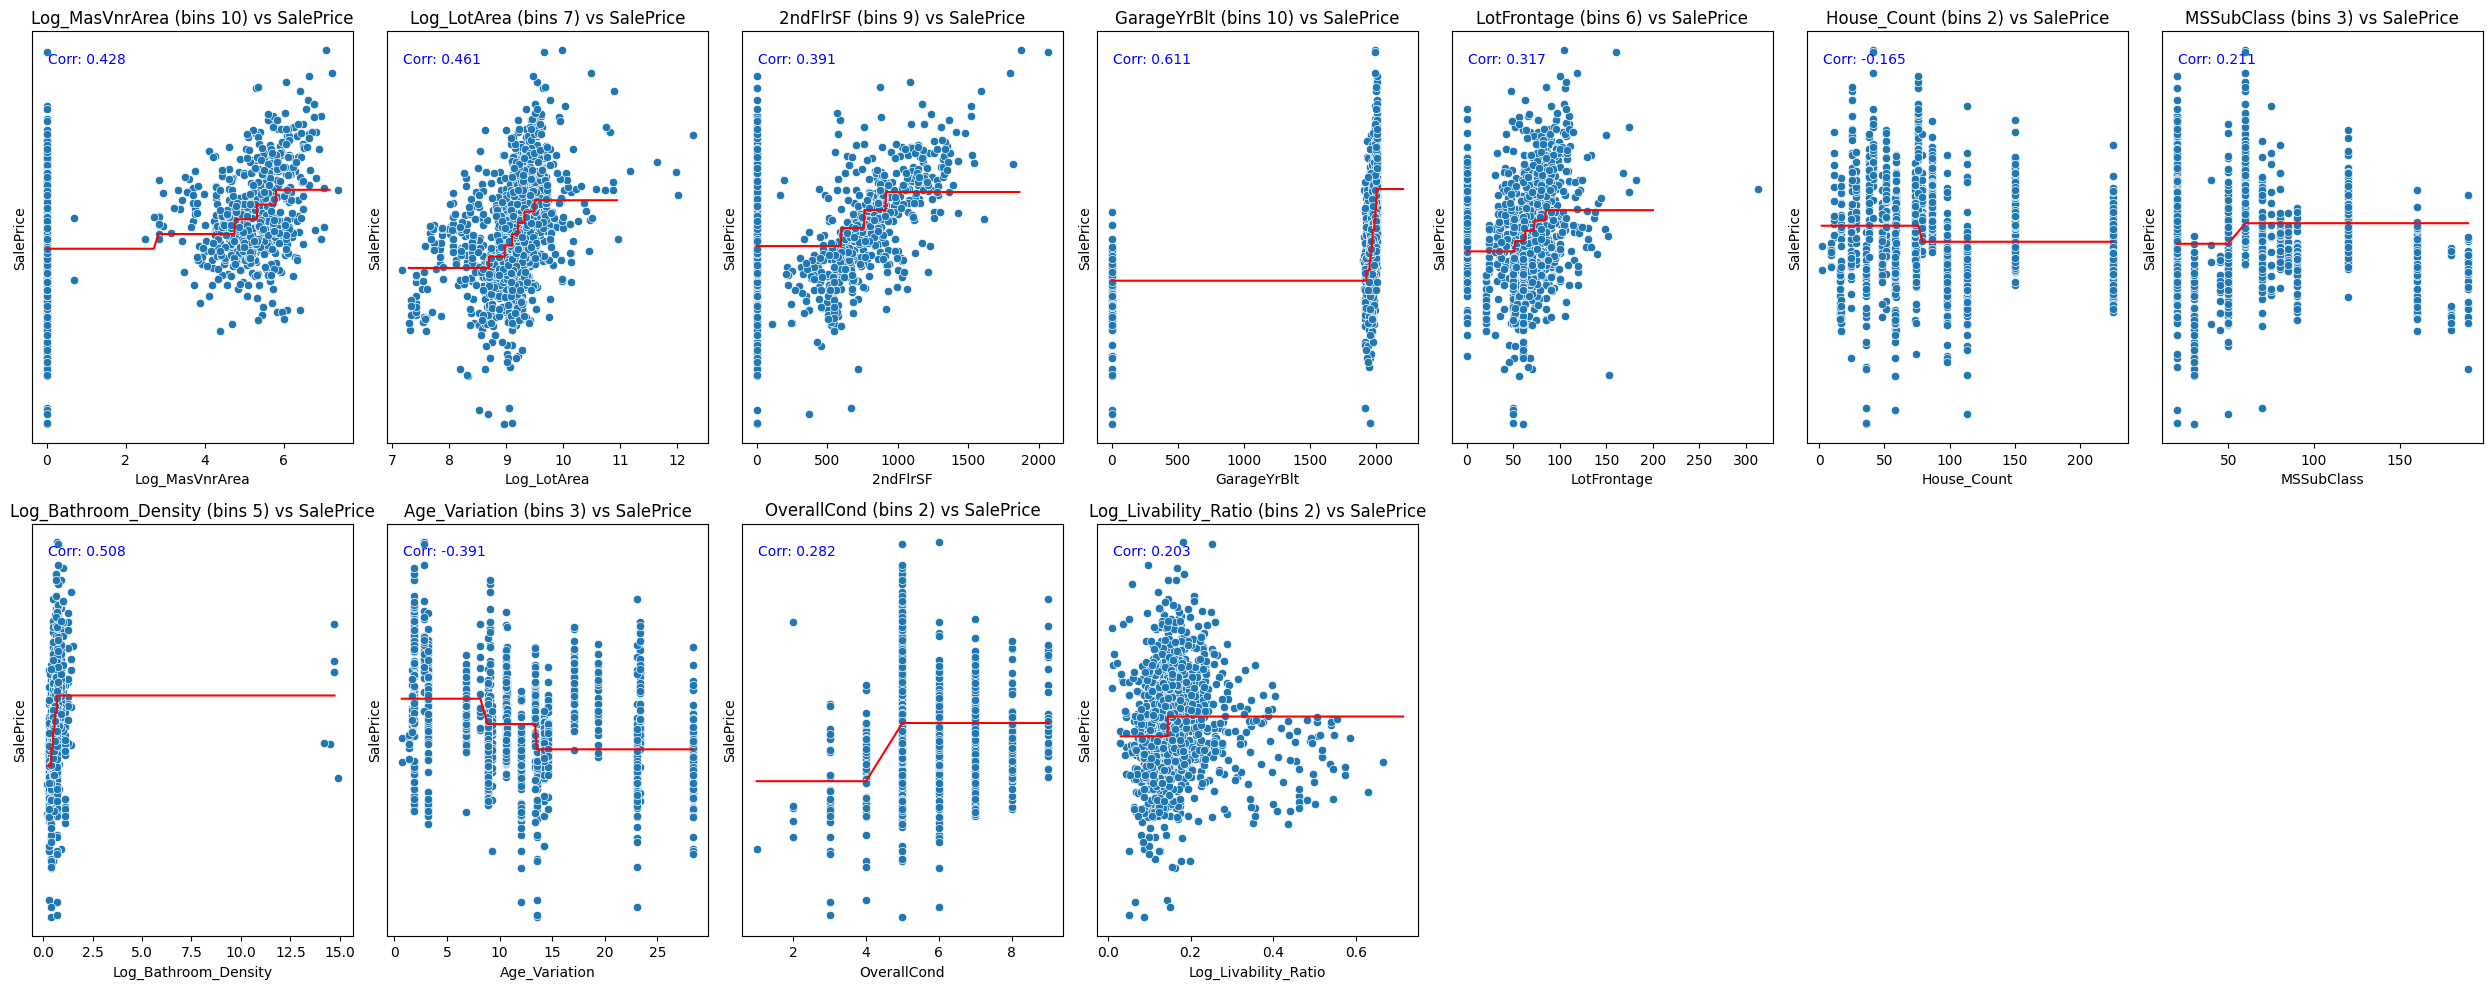

In [41]:
target = 'SalePrice'
X = X_train_skew[stepwise]
num_vars = len(var_cuts_dict)
num_rows = (num_vars // 7) + 1  # 7 cols per row
fig, axes = plt.subplots(num_rows, 7, figsize=(25, 5 * num_rows))
axes = axes.ravel()

for i, (var, bins) in enumerate(var_cuts_dict.items()):
    kbins = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='quantile', subsample=None, random_state = 2025)
    X_binned = kbins.fit_transform(X_train_skew[[var]])
    model = LinearRegression().fit(X_binned, y_train)
    X_test_transf = kbins.transform(X_test_skew[[var]])
    model_preds = model.predict(X_test_transf)
    sorted_indices = np.argsort(X_test_skew[var].values)
    X_test_skew_sorted = X_test_skew[var].iloc[sorted_indices]
    model_preds_sorted = model_preds[sorted_indices]

    sns.scatterplot(x=X[var], y=y_train, ax=axes[i])
    axes[i].plot(X_test_skew_sorted, model_preds_sorted, color = 'red')
    axes[i].set_title(f'{var} (bins {bins}) vs {target}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target)
    axes[i].set_yticks(np.arange(min_sale, max_sale, 75000))
    correlation = np.corrcoef(X_binned[:, 0], y_train)[0, 1]
    axes[i].annotate(f'Corr: {correlation:.3f}', xy=(0.05, 0.95), xycoords='axes fraction',
                     fontsize=10, color='blue', ha='left', va='top')

for j in range(num_vars, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

These graphs are not part of model training but are used to understand how binning affects the relationship between features and SalePrice. They help assess whether discretizing a variable improves the model’s ability to capture non-linear relationships.

In [42]:
class Discretizer(BaseEstimator, TransformerMixin):
    def __init__(self, dictionary):
        self.dictionary = dictionary
        self.kbin_transformers = {}

    def fit(self, X, y = None):
        for col, num_bins in self.dictionary.items():
            kbins = KBinsDiscretizer(n_bins=num_bins , encode='ordinal', strategy='quantile', subsample=None, random_state = 2025)
            kbins.fit(X[[col]])
            self.kbin_transformers[col] = kbins
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col, transformer in self.kbin_transformers.items():
            discretized_values = transformer.transform(X[[col]]).ravel()
            col_name = f'{col}_binned'
            X_transformed[col_name] = discretized_values
        return X_transformed

pipeline_binning = Pipeline(steps = [
    ('Binning Vars', Discretizer(dictionary = var_cuts_dict))
])

X_train_binned = pipeline_binning.fit_transform(X_train_skew)
X_test_binned = pipeline_binning.transform(X_test_skew)

col = list(set(X_train_binned.columns) - set(X_test_binned.columns))
print(col)
X_train_binned.shape


[]


c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too s

(1454, 86)

# Not numerical Features

First, we start preprocessing the binary variables using the Dummifier class. This class is responsible for creating flag variables while dropping the first column to eliminate extra collinearity, which will be addressed in the next notebook.



In [43]:
binary_list = []
for col in new_nominales_fe:
    unique_vals = X_train_fe[col].nunique()
    if unique_vals <= 2:
        binary_list.append(col)
print(binary_list)

class Dummifier(BaseEstimator, TransformerMixin):
    def __init__(self, binary_columns):
        self.binary_columns = binary_columns
        self.dummie_columns = None

    def fit(self, X, y = None):
        dummies = pd.get_dummies(X[self.binary_columns], drop_first =True)
        self.dummie_columns = dummies.columns.tolist()
        return self

    def transform(self, X):
        X_transf = X.copy()
        dummy_df = pd.get_dummies(X[self.binary_columns], drop_first = True).astype(int)
        aligned_dummies = dummy_df.reindex(columns = self.dummie_columns)
        X_transf = X.drop(columns = self.binary_columns)
        return pd.concat([X_transf, aligned_dummies], axis = 1)

pipeline_dummifier = Pipeline(steps = [
    ('Get Dummies for binary', Dummifier(binary_columns = binary_list))
])

X_train_dummy = pipeline_dummifier.fit_transform(X_train_fe[binary_list])
X_test_dummy = pipeline_dummifier.transform(X_test_fe[binary_list])
X_train_dummy.shape

['Has_Alley', 'HasBsmt', 'Has_Pool', 'Has_garage', 'Is_Remodeled', 'MisBsm', 'MisGarage', 'Selling_Season', 'Style_Consistency', 'CentralAir', 'Street']


c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


(1454, 8)

# Nominal Variables
In this part of the preprocessing, we handle the nominal variables using the NominalEncoder class. This class is responsible for encoding categorical variables using the Leave-One-Out Encoding (LOO Encoding) technique. Additionally, it ensures that unknown categories are handled by imputing the most frequent category, super useful for the test set. This transformer its also really good because it doesnt create more columns to our df.


In [44]:
nominal_list = list(set(new_nominales_fe) - set(binary_list))
class NominalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, nominal_list):
        self.nominal_list = nominal_list
        self.encoder = None
        self.train_categories = {}

    def fit(self, X, y):
        for col in self.nominal_list:
            self.train_categories[col] = set(X[col].unique())

        self.encoder = LeaveOneOutEncoder(cols=self.nominal_list, handle_unknown='impute')
        self.encoder.fit(X, y)
        return self

    def transform(self, X):
        X_transf = X.copy()
        for col in self.nominal_list:
            most_frequent = X_transf[col].mode()[0]
            X_transf[col] = X_transf[col].where(
                X_transf[col].isin(self.train_categories[col]),
                other=most_frequent
            )
        X_transf = self.encoder.transform(X_transf)
        return pd.DataFrame(X_transf, index=X.index, columns=X.columns)

nominal_encoder_pipeline = Pipeline(steps = [
    ('nominal_encoder', NominalEncoder(nominal_list = nominal_list))
])

X_train_nominales = nominal_encoder_pipeline.fit_transform(X_train_fe[nominal_list], y_train)
X_test_nominales = nominal_encoder_pipeline.transform(X_test_fe[nominal_list])

print(f'Nominales shape {X_train_nominales.shape}')
print(nominal_list)

#Workflow for non linear models in the next notebook

non_linear_pipeline_workflow = Pipeline(steps = [
    ('preprocessing_pipeline', full_pipeline),
    ('dummifier', pipeline_dummifier),
    ('nominal_pipeline', NominalEncoder(nominal_list = nominal_list))
])

df_train_non_linear =  non_linear_pipeline_workflow.fit_transform(X_train, y_train)
df_train_non_linear = pd.concat([df_train_non_linear, y_train], axis = 1)
df_test_non_linear = non_linear_pipeline_workflow.transform(df_test)
df_train_non_linear.to_csv('..//data//preprocessed_data//train_fe_nonlinear.csv')
df_test_non_linear.to_csv('..//data//preprocessed_data//test_fe_nonlinear.csv')

c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Nominales shape (1454, 24)
['MasVnrType', 'SaleCondition_Neighbord', 'Exterior2nd', 'SaleType', 'MSZoning', 'RoofMatl', 'Condition1', 'SaleType_Neighbord', 'Neighborhood', 'BldgType', 'Alley', 'SaleCondition', 'HouseStyle', 'Condition2', 'LandContour', 'Electrical', 'Exterior1st', 'Heating', 'LotConfig', 'SaleType_SaleCondition', 'MiscFeature', 'Decade_Built', 'RoofStyle', 'Foundation']


c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\javie\OneDrive\Escritorio\HousePrediction\HousingPrediction\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead 

In [45]:
X_train_ordinal = X_train_fe[ordinales]
X_test_ordinal = X_test_fe[ordinales]
df_train_completed = pd.concat([X_train_binned, X_train_dummy, X_train_nominales, X_train_ordinal, y_train], axis = 1)
df_test_completed = pd.concat([X_test_binned, X_test_dummy, X_test_nominales, X_test_ordinal], axis = 1)

df_train_completed.to_csv('..//data//preprocessed_data//train_processed.csv')
df_test_completed.to_csv('..//data//preprocessed_data//test_processed.csv')

# Conclusion

In this notebook, we conducted an exploratory analysis of the dataset and examined the distributions of the variables. Our analysis revealed several key findings:

**High Leverage Points**:

Our independent features contained high leverage points that obscured the true correlations and the explained variance due to elevated residuals. To address this issue, applying winsorize would help but I decided to avoid using it and instead when applying the model using a MinMaxScaler.

**Outliers**:

The predictor variable was found to be right-skewed, exhibiting long tails in its distribution. To stabilize the variance, we applied a logarithmic transformation not only to the predictor but also to all other skewed continuous variables.

**Feature Engineering**:

Based on insights from scatterplots, we created several new features. These included binary indicators reflecting the presence or absence of certain house characteristics, as well as features that assessed the quality and luxury of those attributes. Importantly, these features were engineered prior to imputation to accurately capture the impact of missing values.

**Imputing Missing Values**:

Missing values were addressed by introducing a constant—filling with an "NA" category for categorical variables or with 0 for numerical variables.

**Categorical Encoding**:

To capture the effect of non-numerical categories (nominal variables) on house prices, we employed a Leave-One-Out encoding approach, which provided insights into the influence of each category on price increments.

**Binning**:

We implemented binning to create stepwise functions that better represent changes in price over specific ranges of continuous variables. This technique improved the correlation with the target variable.

**Iterative Methodology**:

Throughout the notebook, an iterative approach was adopted, testing various techniques that ultimately did not enhance the final outcome. For example, although we experimented with polynomial features and natural splines, the data did not exhibit significant non-linear patterns, and the binning approach yielded superior results.

In the next chapters I will focus on feature selection, using L1 penalty as filter, filtering by correlation, sequential feature selection and hypertunning.

# Extra: Splines

The idea is to create a polynomial smoothed curve that fits the data in a smoother way with narrow confidence intervals.

In [ ]:
df_var_dict = {}
for col in numericas:
    scores_dict = {}
    max_degrees_of_freedom = 10
    for degrees_of_freedom in range(3, max_degrees_of_freedom + 1):
        X_transf = dmatrix(f'bs(Q("{col}"), df = {degrees_of_freedom})', data = {f'{col}': X_train_fe[col]}, return_type = 'dataframe')
        model = LinearRegression()
        mse = (-np.mean(cross_val_score(model, X_transf, y_train, scoring = 'neg_mean_squared_error', cv = 10)))
        scores_dict[degrees_of_freedom] = mse

    min_df = min(scores_dict, key= scores_dict.get)
    df_var_dict[col] = min_df
print(df_var_dict)



In [ ]:
num_vars = len(df_var_dict)
num_rows = (num_vars // 7) + 1
fig, axes = plt.subplots(num_rows, 7, figsize=(25, 5 * num_rows))
axes = axes.ravel()

for i, (var, degrees_of_freedom) in enumerate(df_var_dict.items()):
    X_transf = dmatrix(
        f'bs(Q("{var}"), df={degrees_of_freedom})',
        data={var: X_train_fe[var]},
        return_type='dataframe'
    )


    corr_series = X_transf.apply(lambda col: np.corrcoef(col, y_train)[0, 1])
    overall_corr = corr_series.mean()

    model = LinearRegression().fit(X_transf, y_train)
    X_test_transf = dmatrix(
        f'bs(Q("{var}"), df={degrees_of_freedom})',
        data={var: X_test_fe[var]},
        return_type='dataframe'
    )
    model_preds = model.predict(X_test_transf)
    sorted_indices = np.argsort(X_test_fe[var].values)
    X_test_sorted = X_test_fe[var].iloc[sorted_indices]
    model_preds_sorted = model_preds[sorted_indices]
    sns.scatterplot(x=X_train_fe[var], y=y_train, ax=axes[i])
    axes[i].plot(X_test_sorted, model_preds_sorted, color='red')
    axes[i].set_title(f'{var} (df {degrees_of_freedom}) vs {target}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target)
    axes[i].set_yticks(np.arange(min_sale, max_sale, 75000))
    axes[i].annotate(f'Corr: {overall_corr:.3f}', xy=(0.05, 0.95), xycoords='axes fraction',
                     fontsize=10, color='blue', ha='left', va='top')

for j in range(num_vars, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


# Natural Splines

In [ ]:
df_var_dict = {}
for col in numericas:
    scores_dict = {}
    max_degrees_of_freedom = 10
    for degrees_of_freedom in range(3, max_degrees_of_freedom + 1):
        X_transf = dmatrix(f'cr(Q("{col}"), df = {degrees_of_freedom})', data = {f'{col}': X_train_fe[col]}, return_type = 'dataframe')
        model = LinearRegression()
        mse = (-np.mean(cross_val_score(model, X_transf, y_train, scoring = 'neg_mean_squared_error', cv = 10)))
        scores_dict[degrees_of_freedom] = mse

    min_df = min(scores_dict, key= scores_dict.get)
    df_var_dict[col] = min_df
print(df_var_dict)



In [ ]:
num_vars = len(df_var_dict)
num_rows = (num_vars // 7) + 1
fig, axes = plt.subplots(num_rows, 7, figsize=(25, 5 * num_rows))
axes = axes.ravel()

for i, (var, degrees_of_freedom) in enumerate(df_var_dict.items()):
    X_transf = dmatrix(
        f'cr(Q("{var}"), df={degrees_of_freedom})',
        data={var: X_train_fe[var]},
        return_type='dataframe'
    )

    corr_series = X_transf.apply(lambda col: np.corrcoef(col, y_train)[0, 1])
    overall_corr = corr_series.mean()  

    model = LinearRegression().fit(X_transf, y_train)

    X_test_transf = dmatrix(
        f'cr(Q("{var}"), df={degrees_of_freedom})',
        data={var: X_test_fe[var]},
        return_type='dataframe'
    )
    model_preds = model.predict(X_test_transf)

    sorted_indices = np.argsort(X_test_fe[var].values)
    X_test_sorted = X_test_fe[var].iloc[sorted_indices]
    model_preds_sorted = model_preds[sorted_indices]

    sns.scatterplot(x=X_train_fe[var], y=y_train, ax=axes[i])
    axes[i].plot(X_test_sorted, model_preds_sorted, color='red')
    axes[i].set_title(f'{var} (df {degrees_of_freedom}) natural Spline vs {target}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target)
    axes[i].set_yticks(np.arange(min_sale, max_sale, 75000))
    axes[i].annotate(f'Corr: {overall_corr:.3f}', xy=(0.05, 0.95), xycoords='axes fraction',
                     fontsize=10, color='blue', ha='left', va='top')

for j in range(num_vars, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()
